In [ ]:
from google.colab import drive
import os
import random
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:

drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/AISC/Furniture Unzipped Files"
output_path = "/content/drive/My Drive/AISC/Random"

class_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

print(class_folders)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['table', 'fridge', 'tv', 'chair', 'cabinets,cupboards,etc']


In [ ]:
if os.path.exists(output_path):
    for filename in os.listdir(output_path):
        file_path = os.path.join(output_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)  # Remove individual files
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)

for folder in class_folders:
    folder_path = os.path.join(data_dir, folder)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select 30 images (or fewer if there aren't enough images)
    selected_images = random.sample(images, min(30, len(images)))

    # Create a subfolder in the output directory for each class
    output_class_path = os.path.join(output_path, folder)
    os.makedirs(output_class_path, exist_ok=True)

    # Copy the selected images to the class folder within the output directory
    print(f"Copying {len(selected_images)} images from '{folder}'...")
    for img in selected_images:
        source_path = os.path.join(folder_path, img)
        destination_path = os.path.join(output_class_path, img)  # Place image in the corresponding class folder
        shutil.copy2(source_path, destination_path)

print(f"✅ Successfully copied images to: {output_path}")

Copying 30 images from 'table'...
Copying 30 images from 'fridge'...
Copying 30 images from 'tv'...
Copying 30 images from 'chair'...
Copying 30 images from 'cabinets,cupboards,etc'...
✅ Successfully copied images to: /content/drive/My Drive/AISC/Random


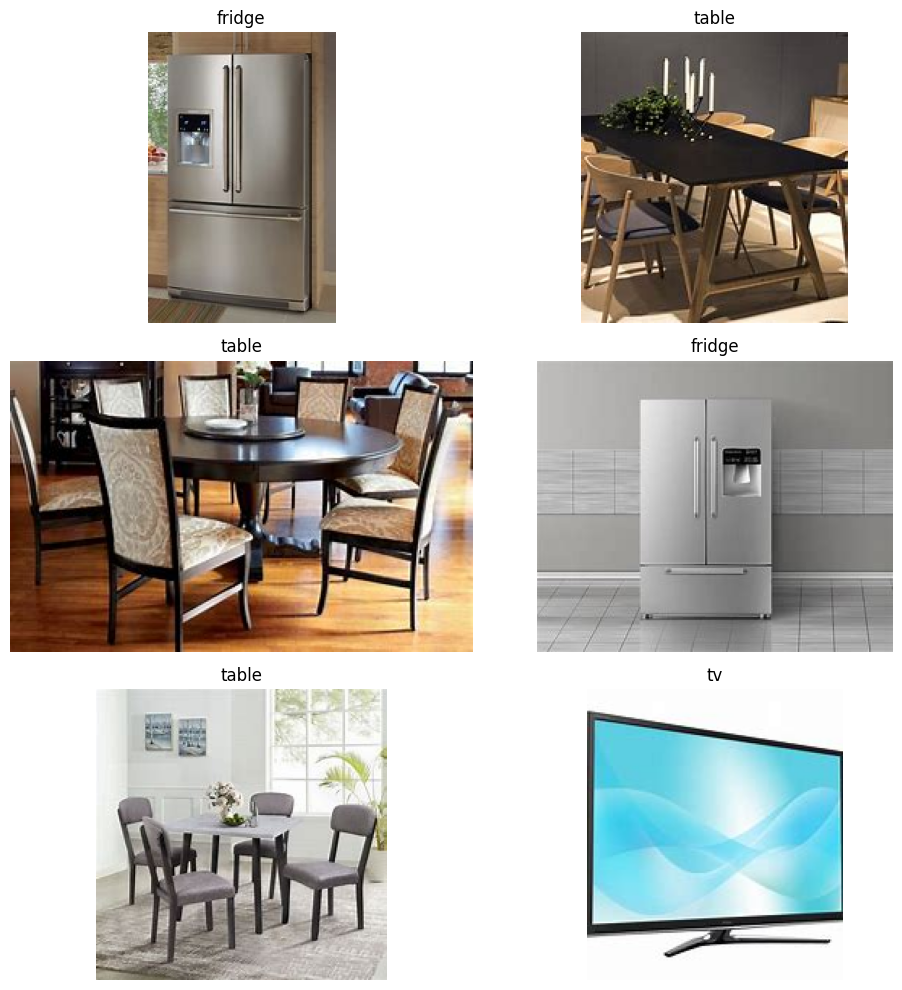

In [ ]:
selected_images_dict = {}

# Populate the dictionary with the already selected images from each class folder
for folder in class_folders:
    folder_path = os.path.join(output_path, folder)
    selected_images_dict[folder] = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Set up the grid for displaying images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Adjust the grid size as needed

# Iterate over the grid and load random images from the pre-selected ones
for i, ax in enumerate(axes.flatten()):
    # Randomly pick a class from the pre-selected images
    class_folder = random.choice(class_folders)
    class_images = selected_images_dict[class_folder]

    # Pick a random image from the selected class images
    image_file = random.choice(class_images)
    image_path = os.path.join(output_path, class_folder, image_file)

    # Open and display the image in the grid
    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(class_folder)

# Adjust layout and show the grid
plt.tight_layout()
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None